## Machine Learning Exercise 1.

* TODO:여기에 조 이름과 조원 이름을 작성해 주세요. 파일 제목에도 조 이름을 명시해 주세요

In [1]:
import numpy as np

%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Import IRIS dataset
iris = datasets.load_iris()

### task1: very simple data analysis
* 아래에 슬라이드에 제시된 scatter plot를 구현하세요

In [3]:
x = iris.data[:,:2]
y = iris.target
h = .02

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
5              5.4           3.9            1.7           0.4        0
6              4.6           3.4            1.4           0.3        0
7              5.0           3.4            1.5           0.2        0
8              4.4           2.9            1.4           0.2        0
9              4.9           3.1            1.5           0.1        0
10             5.4           3.7            1.5           0.2        0
11             4.8           3.4            1.6           0.2        0
12             4.8           3.0            1.4           0.1        0
13    

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


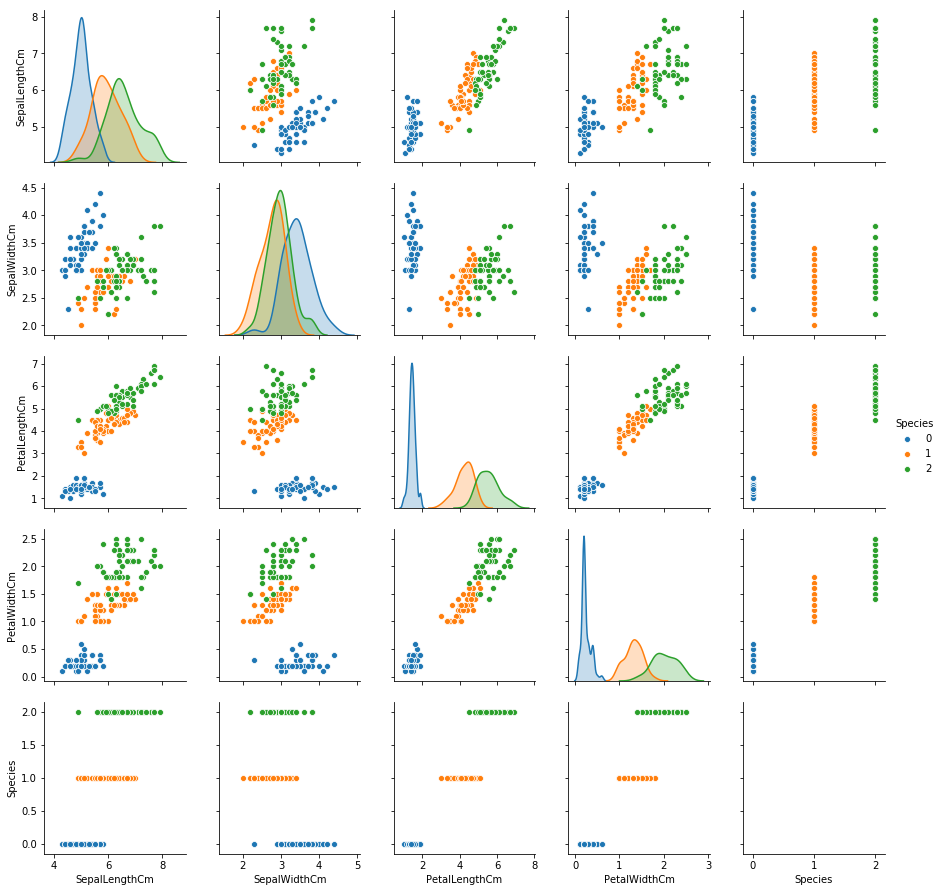

In [4]:
df_iris = pd.DataFrame({'SepalLengthCm':iris.data[:,0],'SepalWidthCm':iris.data[:,1],'PetalLengthCm':iris.data[:,2],'PetalWidthCm':iris.data[:,3],'Species':iris.target})
print(df_iris)
sns.pairplot(data=df_iris , hue='Species')

### task2: bias-variance tradeoff
 * 아래 코드의 n_neighbor를 수정했을 때의 변화를 나타내고 tradeoff 관점에서 기술하세요.

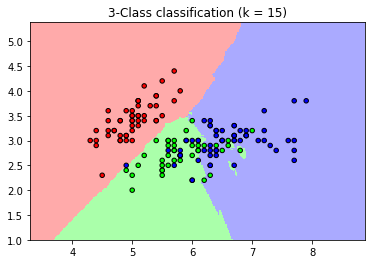

In [5]:
n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()


In [6]:
n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
Z.shape

(61600,)

In [8]:
xx.shape

(220, 280)

### task 3: training-test set split
* 슬라이드에 제시한 그림을 구현하세요

In [10]:
train,test = train_test_split(df_iris , test_size = 0.3, random_state=1)
print('train dim: ',train.shape,'\n test dim:', test.shape)

train dim:  (105, 5) 
 test dim: (45, 5)


In [11]:
X_train = np.array(train[['SepalLengthCm','SepalWidthCm']])
y_train = np.array(train[['Species']])
X_test = np.array(test[['SepalLengthCm','SepalWidthCm']])
y_test = np.array(test[['Species']])

In [12]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [13]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [14]:
y_predict = clf.predict(X_test)

In [ ]:
y_predict , y_test

In [ ]:
y_test = y_test.reshape(-1)

ValueError: not enough values to unpack (expected 2, got 1)

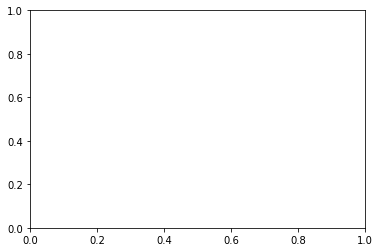

In [16]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# # Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict,marker='x' , cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()


### task 4: overfitting
 * 슬라이드에서 제시한 plot를 구현하고 이 현상을 설명하세요

In [15]:
train,test = train_test_split(df_iris , test_size = 0.3, random_state=1)
print('train dim: ',train.shape,'\n test dim:', test.shape)

train dim:  (105, 5) 
 test dim: (45, 5)


In [17]:
X_train = np.array(train[['SepalLengthCm','SepalWidthCm']])
y_train = np.array(train[['Species']])
X_test = np.array(test[['SepalLengthCm','SepalWidthCm']])
y_test = np.array(test[['Species']])

* TODO: 위의 그림을 설명

In [18]:
from sklearn.metrics import accuracy_score

n_neighbors = 30
test_acc , train_acc = [],[]
for i in range(n_neighbors,0,-1):
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(X_train, y_train)
    y_test_predict = clf.predict(X_test)
    y_train_predict = clf.predict(X_train)
    test_acc.append([i , (1-accuracy_score(y_test, y_test_predict))])
    train_acc.append([i , (1-accuracy_score(y_train, y_train_predict))])

C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\DS\Anaconda3\envs\ds2\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\DS\Anaconda3\envs\d

In [49]:
p = np.array(train_acc)[:,0]

In [39]:
a = list(map(lambda x : 1/x[0] , test_acc))
b = list(map(lambda x : x[1] , test_acc))
c = list(map(lambda x : 1/x[0] , train_acc))
d = list(map(lambda x : x[1] , train_acc))

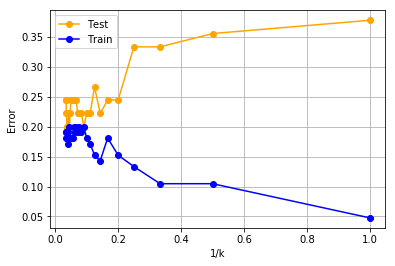

In [37]:
# plt.plot(a,b , color='Orange' , marker='o')
# plt.plot( c,d , color='blue' ,  marker='o')
plt.plot(1/np.array(test_acc)[:,0],np.array(test_acc)[:,1] , color='Orange' , marker='o')
plt.plot(1/np.array(train_acc)[:,0],np.array(train_acc)[:,1] , color='blue' ,  marker='o')
plt.legend(('Test' , 'Train'))
plt.ylabel('Error')
plt.xlabel('1/k')
plt.grid(True)